# Getting RIVM subtypes for EV-D68 whole genome sequences

In [ ]:
from Bio import SeqIO
import re
import sys

## Write the sequence.fasta to 6 different scripts, batch sizes n=250
seq = SeqIO.parse("~/workspace/fluclades/sequences.fasta", "fasta")
seqs = list(seq)
n = 250
for i in range(0, len(seqs), n):
    with open(f"batch_{i//n}.fasta", "w") as f:
        SeqIO.write(seqs[i:i+n], f, "fasta")


## RIVM
jobids:
- 1323197622
- 1955294092
- 1478213118
- 2084693138
- 587450456
- 1742805430

use [this link](https://www.rivm.nl/mpf/typingtool/enterovirus/job/1742805430) to access the results.

In [2]:
## read the results files and combine them to one dataframe
import pandas as pd
import os

dfs = []

# the results files are named RIVM/results (0).csv, RIVM/results (1).csv, ...
for i in range(0, 6):
    df = pd.read_csv(f"~/workspace/fluclades/RIVM/results ({i}).csv")
    dfs.append(df)

df = pd.concat(dfs)
df.drop_duplicates(subset="name", inplace=True)

# what are the contents of the columns?
# for col in df.columns:
#     print(col, df[col].unique())

# df["VP1 subgenogroup support"].hist(bins=50)
# # df["VP1 subgenogroup"].value_counts()
# # show the rows that have NL96, US00, US02, NL96, U1

# df[df["VP1 subgenogroup"].str.contains("NL96|US00|US02|NL96,U1", na=False)].head()
# # VP1 subgenogroup support is generally very high. The strange subgenotypes above are kept for now but might be removed at a later point. 
# df[df["VP1 subgenogroup"].str.contains("Could not assign", na=False)].head()

# replace the "Could not assign" with actual values: (hacky solution, copy pasted from RIVM website)
# KX255372 Assignment: US02 Bootstrap support: 72.0
df.loc[df.name == "KX255372", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX255372", "VP1 subgenogroup support"] = 72.0
# KX255388 Assignment: US02 Bootstrap support: 59.0
df.loc[df.name == "KX255388", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX255388", "VP1 subgenogroup support"] = 59.0
# KX255393 Assignment: C Bootstrap support: 17.0
df.loc[df.name == "KX255393", "VP1 subgenogroup"] = "C"
df.loc[df.name == "KX255393", "VP1 subgenogroup support"] = 17.0
# KX255397 Assignment: C Bootstrap support: 19.0
df.loc[df.name == "KX255397", "VP1 subgenogroup"] = "C"
df.loc[df.name == "KX255397", "VP1 subgenogroup support"] = 19.0
# KX255410 Assignment: US02 Bootstrap support: 77.0
df.loc[df.name == "KX255410", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX255410", "VP1 subgenogroup support"] = 77.0

# KX384960 Assignment: US02 Bootstrap support: 25.0
df.loc[df.name == "KX384960", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX384960", "VP1 subgenogroup support"] = 25.0
# MN240501 Assignment: A Bootstrap support: 76.0
df.loc[df.name == "MN240501", "VP1 subgenogroup"] = "A"
df.loc[df.name == "MN240501", "VP1 subgenogroup support"] = 76.0
# MN240502 Assignment: US02 Bootstrap support: 38.0
df.loc[df.name == "MN240502", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "MN240502", "VP1 subgenogroup support"] = 38.0
# MN240511 Assignment: US02 Bootstrap support: 69.0
df.loc[df.name == "MN240511", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "MN240511", "VP1 subgenogroup support"] = 69.0
# PQ415017 Assignment: A2 Bootstrap support: 9.0 
df.loc[df.name == "PQ415017", "VP1 subgenogroup"] = "A2"
df.loc[df.name == "PQ415017", "VP1 subgenogroup support"] = 9.0
# AB601885 Assignment: C Bootstrap support: 71.0
df.loc[df.name == "AB601885", "VP1 subgenogroup"] = "C"
df.loc[df.name == "AB601885", "VP1 subgenogroup support"] = 71.0
# KM892501 Assignment: B1 Bootstrap support: 40.0
df.loc[df.name == "KM892501", "VP1 subgenogroup"] = "B1"
df.loc[df.name == "KM892501", "VP1 subgenogroup support"] = 40.0
# KP455263 Assignment: NL96 Bootstrap support: 43.0
df.loc[df.name == "KP455263", "VP1 subgenogroup"] = "NL96"
df.loc[df.name == "KP455263", "VP1 subgenogroup support"] = 43.0
# KP455289 Assignment: US02 Bootstrap support: 38.0
df.loc[df.name == "KP455289", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KP455289", "VP1 subgenogroup support"] = 38.0
# KT285484 Assignment: A Bootstrap support: 0.0
df.loc[df.name == "KT285484", "VP1 subgenogroup"] = "A"
df.loc[df.name == "KT285484", "VP1 subgenogroup support"] = 0.0

df["VP1 subgenogroup"].value_counts()


VP1 subgenogroup
B3      916
B1      281
A2      168
A1       64
C        47
B2       30
US02      9
US00      8
B         4
A         4
NL96      3
U1        1
Name: count, dtype: int64

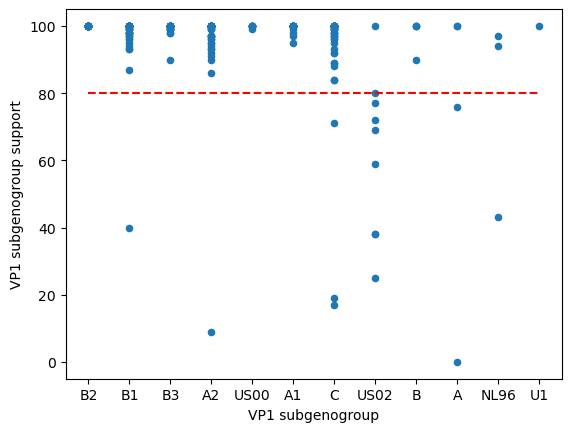

In [3]:
import matplotlib.pyplot as plt

df.plot(x="VP1 subgenogroup", y="VP1 subgenogroup support", kind="scatter")
plt.plot([0, 11], [80, 80], color='red', linestyle='--')


US02 and C have the worst support. The normal cut-off is 80% in RIVM. 

,name,VP1 subgenogroup
0,KT455422,B2
1,KT455423,B1
2,KT455424,B1
3,KT455425,B1
4,KT455426,B1


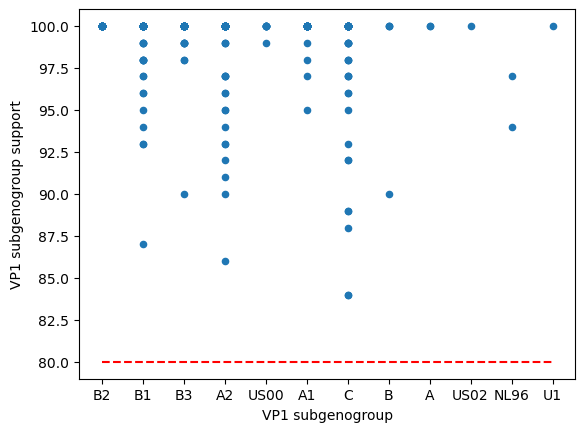

In [4]:
# get a lookup table with all bootstrapping values higher than 60%, replace below 60% with "Unassigned"
data = df[["name", "VP1 subgenogroup", "VP1 subgenogroup support"]]
# data["VP1 subgenogroup support"] = data["VP1 subgenogroup support"].apply(lambda x: x if x > 80 else "Unassigned")
data=data.loc[data["VP1 subgenogroup support"]>80]

data.plot(x="VP1 subgenogroup", y="VP1 subgenogroup support", kind="scatter")
plt.plot([0, 11], [80, 80], color='red', linestyle='--')

data.drop("VP1 subgenogroup support",axis=1,inplace=True)
data.to_csv("~/workspace/fluclades/data/RIVM_genotype_80.csv", index=False)
data.head()

Filter for all subgenotypes > 80% support. Leaves some sequences with unknown subgenotype.